In [44]:
import pandas as pd
import json

import functions

import plotly.express as px
import plotly.graph_objects as go

In [45]:
pd.reset_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

## Data

In [46]:
customer_info = pd.read_csv("C:/Users/aprataso/Downloads/final_data/treated/customer_data_complete.csv")

In [47]:
# Apply deserialization
customer_info['quantity'] = customer_info['quantity'].apply(functions.deserialize_list)
customer_info['sales_value_eu'] = customer_info['sales_value_eu'].apply(functions.deserialize_list)
customer_info['department'] = customer_info['department'].apply(functions.deserialize_list)

In [48]:
#customer_info = customer_info.drop(['Unnamed: 0'], axis = 1)

In [49]:
'''# Convert JSON strings back to dictionaries
customer_info['dep_quantity'] = customer_info['dep_quantity'].apply(lambda x: json.loads(x))'''

"# Convert JSON strings back to dictionaries\ncustomer_info['dep_quantity'] = customer_info['dep_quantity'].apply(lambda x: json.loads(x))"

In [50]:
customer_info.head(2)

,household_key,quantity,retail_disc,coupon_disc,coupon_match_disc,sales_value_eu,department,first_transaction_date,marital_status_code,homeowner_desc,marital_status,age_group,adult_category_size,has_kids,avg_age,avg_income,n_kids,n_household,Groceries_spend,DELI_spend,Meat_spend,Bakery_spend,DRUG GM_spend,SALAD BAR_spend,MISC SALES TRAN_spend,RESTAURANT_spend,FLORAL_spend,Seafood_spend,COSMETICS_spend,KIOSK-GAS_spend,CHEF SHOPPE_spend,GARDEN CENTER_spend,MISC. TRANS._spend,SPIRITS_spend,DAIRY DELI_spend,AUTOMOTIVE_spend,TRAVEL & LEISUR_spend,CNTRL/STORE SUP_spend,COUP/STR & MFG_spend,GM MERCH EXP_spend,POSTAL CENTER_spend,DELI/SNACK BAR_spend,VIDEO_spend,CHARITABLE CONT_spend,RX_spend,VIDEO RENTAL_spend,PHOTO_spend,PROD-WHS SALES_spend,PHARMACY SUPPLY_spend,TOYS_spend,HBC_spend,ELECT &PLUMBING_spend,HOUSEWARES_spend,gender
0,1,"[1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, ...",-0.403613,-0.046647,-0.015142,"[4.27, 3.2, 1.17, 3.97, 2.99, 7.69, 2.68, 1.59...","[Groceries, Groceries, Groceries, DELI, Grocer...",2021-02-20,A,Homeowner,married,senior,2.000000,False,65.000000,42000.000000,0.000000,2.000000,3285.020000,226.990000,373.560000,102.010000,568.230000,44.090000,21.400000,4.470000,8.550000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
1,2,"[1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, ...",-0.469174,-0.012605,0.000000,"[0.7, 4.78, 1.07, 0.85, 2.68, 2.68, 2.68, 5.35...","[Groceries, Groceries, Groceries, Groceries, G...",2021-04-13,B,Probable Owner,single,young adult,1.000000,False,21.500000,25000.000000,0.000000,1.000000,1361.500000,50.010000,238.860000,26.550000,353.110000,0.000000,4.560000,0.000000,23.530000,9.620000,23.620000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [51]:
customer_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 54 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   household_key           2500 non-null   int64  
 1   quantity                2500 non-null   object 
 2   retail_disc             2500 non-null   float64
 3   coupon_disc             2500 non-null   float64
 4   coupon_match_disc       2500 non-null   float64
 5   sales_value_eu          2500 non-null   object 
 6   department              2500 non-null   object 
 7   first_transaction_date  2500 non-null   object 
 8   marital_status_code     2500 non-null   object 
 9   homeowner_desc          2500 non-null   object 
 10  marital_status          2500 non-null   object 
 11  age_group               2500 non-null   object 
 12  adult_category_size     2500 non-null   float64
 13  has_kids                2500 non-null   bool   
 14  avg_age                 2500 non-null   

In [52]:
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', '{:.6f}'.format)

customer_info.describe().T

,count,mean,std,min,25%,50%,75%,max
household_key,2500.000000,1250.500000,721.832160,1.000000,625.750000,1250.500000,1875.250000,2500.000000
retail_disc,2500.000000,-0.559792,0.277976,-4.752157,-0.637381,-0.504386,-0.412687,-0.036250
coupon_disc,2500.000000,-0.013840,0.027382,-0.421245,-0.014889,-0.004792,0.000000,0.000000
coupon_match_disc,2500.000000,-0.002266,0.006354,-0.100779,-0.001655,-0.000185,0.000000,0.000000
adult_category_size,2500.000000,1.446800,0.497261,1.000000,1.000000,1.000000,2.000000,2.000000
avg_age,2500.000000,39.913200,14.451595,21.500000,29.500000,39.500000,49.500000,65.000000
avg_income,2500.000000,78072.000000,66852.827436,15000.000000,29500.000000,62000.000000,112000.000000,250000.000000
n_kids,2500.000000,0.442800,0.706348,0.000000,0.000000,0.000000,1.000000,3.000000
n_household,2500.000000,1.953600,1.047610,1.000000,1.000000,2.000000,3.000000,5.000000
Groceries_spend,2500.000000,2033.183072,2063.025391,1.860000,616.980000,1377.490000,2816.665000,16223.980000


## Incoherencies

In [53]:
pd.reset_option('display.max_rows', None)
pd.reset_option('display.max_colwidth', None)

In [54]:
customer_info[customer_info['KIOSK-GAS_spend'] > 100000]

,household_key,quantity,retail_disc,coupon_disc,coupon_match_disc,sales_value_eu,department,first_transaction_date,marital_status_code,homeowner_desc,marital_status,age_group,adult_category_size,has_kids,avg_age,avg_income,n_kids,n_household,Groceries_spend,DELI_spend,Meat_spend,Bakery_spend,DRUG GM_spend,SALAD BAR_spend,MISC SALES TRAN_spend,RESTAURANT_spend,FLORAL_spend,Seafood_spend,COSMETICS_spend,KIOSK-GAS_spend,CHEF SHOPPE_spend,GARDEN CENTER_spend,MISC. TRANS._spend,SPIRITS_spend,DAIRY DELI_spend,AUTOMOTIVE_spend,TRAVEL & LEISUR_spend,CNTRL/STORE SUP_spend,COUP/STR & MFG_spend,GM MERCH EXP_spend,POSTAL CENTER_spend,DELI/SNACK BAR_spend,VIDEO_spend,CHARITABLE CONT_spend,RX_spend,VIDEO RENTAL_spend,PHOTO_spend,PROD-WHS SALES_spend,PHARMACY SUPPLY_spend,TOYS_spend,HBC_spend,ELECT &PLUMBING_spend,HOUSEWARES_spend,gender


In [55]:
'''customer_info['dep_quantity'].apply(lambda x: x.get('KIOSK-GAS', 0))

'''

"customer_info['dep_quantity'].apply(lambda x: x.get('KIOSK-GAS', 0))\n\n"

In [56]:
'''# Check the types of values in the column
print(customer_info['dep_quantity'].apply(type).value_counts())
'''

"# Check the types of values in the column\nprint(customer_info['dep_quantity'].apply(type).value_counts())\n"

In [57]:
customer_info[customer_info['MISC SALES TRAN_spend'] > 100000]

,household_key,quantity,retail_disc,coupon_disc,coupon_match_disc,sales_value_eu,department,first_transaction_date,marital_status_code,homeowner_desc,marital_status,age_group,adult_category_size,has_kids,avg_age,avg_income,n_kids,n_household,Groceries_spend,DELI_spend,Meat_spend,Bakery_spend,DRUG GM_spend,SALAD BAR_spend,MISC SALES TRAN_spend,RESTAURANT_spend,FLORAL_spend,Seafood_spend,COSMETICS_spend,KIOSK-GAS_spend,CHEF SHOPPE_spend,GARDEN CENTER_spend,MISC. TRANS._spend,SPIRITS_spend,DAIRY DELI_spend,AUTOMOTIVE_spend,TRAVEL & LEISUR_spend,CNTRL/STORE SUP_spend,COUP/STR & MFG_spend,GM MERCH EXP_spend,POSTAL CENTER_spend,DELI/SNACK BAR_spend,VIDEO_spend,CHARITABLE CONT_spend,RX_spend,VIDEO RENTAL_spend,PHOTO_spend,PROD-WHS SALES_spend,PHARMACY SUPPLY_spend,TOYS_spend,HBC_spend,ELECT &PLUMBING_spend,HOUSEWARES_spend,gender


In [58]:
customer_info[customer_info['retail_disc'] < -5]

,household_key,quantity,retail_disc,coupon_disc,coupon_match_disc,sales_value_eu,department,first_transaction_date,marital_status_code,homeowner_desc,marital_status,age_group,adult_category_size,has_kids,avg_age,avg_income,n_kids,n_household,Groceries_spend,DELI_spend,Meat_spend,Bakery_spend,DRUG GM_spend,SALAD BAR_spend,MISC SALES TRAN_spend,RESTAURANT_spend,FLORAL_spend,Seafood_spend,COSMETICS_spend,KIOSK-GAS_spend,CHEF SHOPPE_spend,GARDEN CENTER_spend,MISC. TRANS._spend,SPIRITS_spend,DAIRY DELI_spend,AUTOMOTIVE_spend,TRAVEL & LEISUR_spend,CNTRL/STORE SUP_spend,COUP/STR & MFG_spend,GM MERCH EXP_spend,POSTAL CENTER_spend,DELI/SNACK BAR_spend,VIDEO_spend,CHARITABLE CONT_spend,RX_spend,VIDEO RENTAL_spend,PHOTO_spend,PROD-WHS SALES_spend,PHARMACY SUPPLY_spend,TOYS_spend,HBC_spend,ELECT &PLUMBING_spend,HOUSEWARES_spend,gender


## Missing Values

In [59]:
customer_info.isna().sum()

household_key             0
quantity                  0
retail_disc               0
coupon_disc               0
coupon_match_disc         0
sales_value_eu            0
department                0
first_transaction_date    0
marital_status_code       0
homeowner_desc            0
marital_status            0
age_group                 0
adult_category_size       0
has_kids                  0
avg_age                   0
avg_income                0
n_kids                    0
n_household               0
Groceries_spend           0
DELI_spend                0
Meat_spend                0
Bakery_spend              0
DRUG GM_spend             0
SALAD BAR_spend           0
MISC SALES TRAN_spend     0
RESTAURANT_spend          0
FLORAL_spend              0
Seafood_spend             0
COSMETICS_spend           0
KIOSK-GAS_spend           0
CHEF SHOPPE_spend         0
GARDEN CENTER_spend       0
MISC. TRANS._spend        0
SPIRITS_spend             0
DAIRY DELI_spend          0
AUTOMOTIVE_spend    

## Outliers

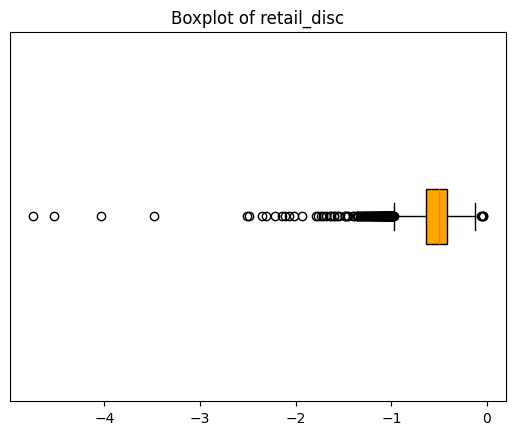

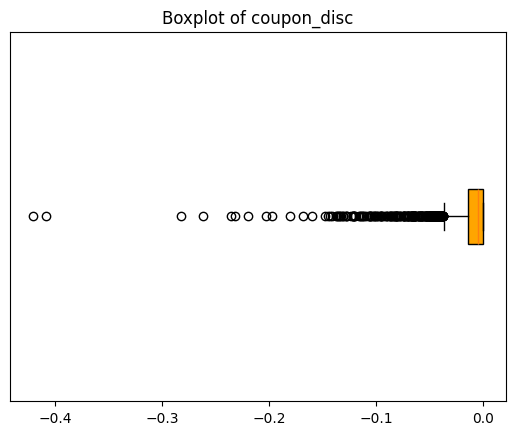

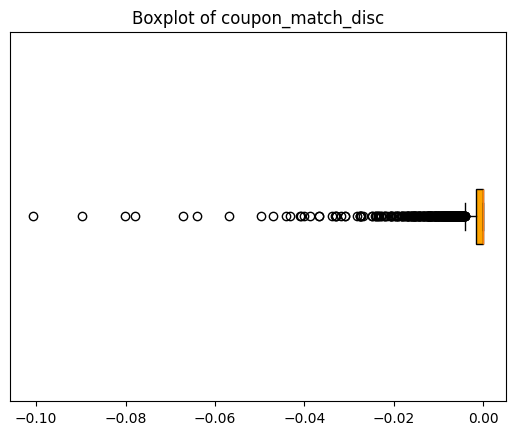

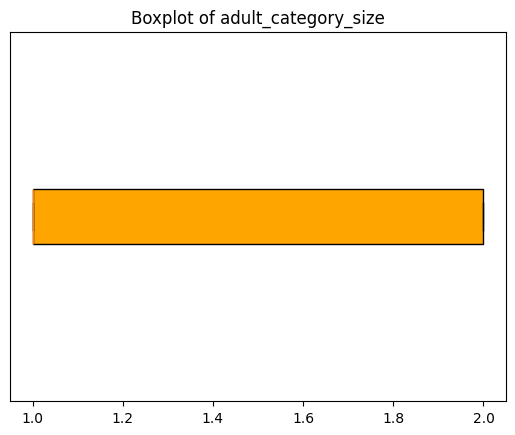

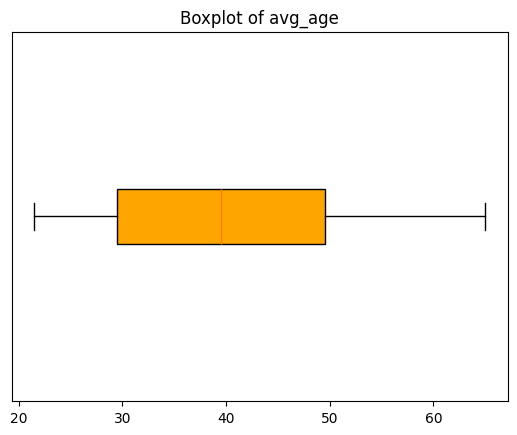

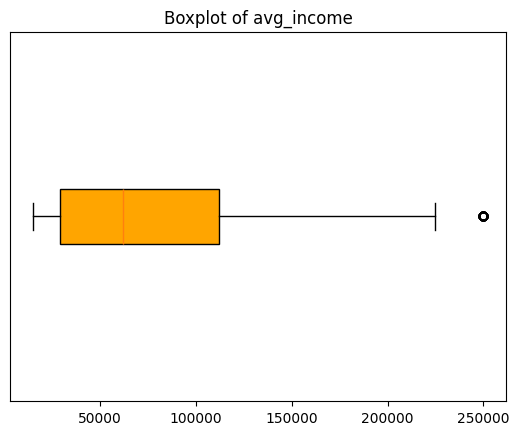

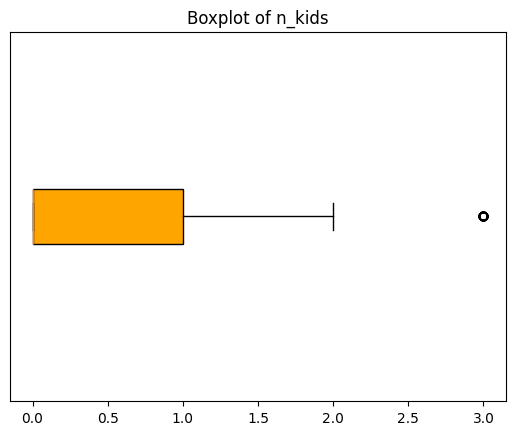

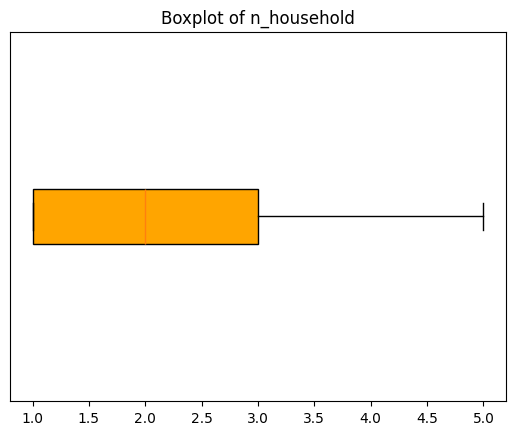

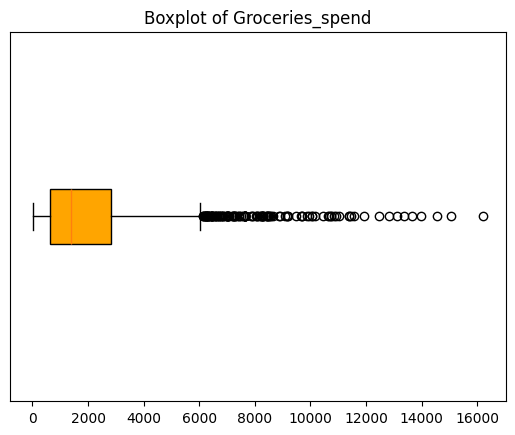

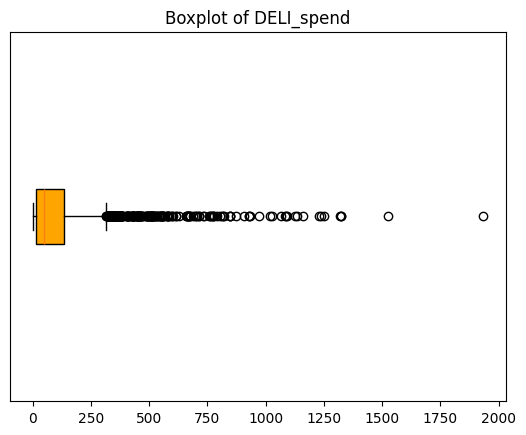

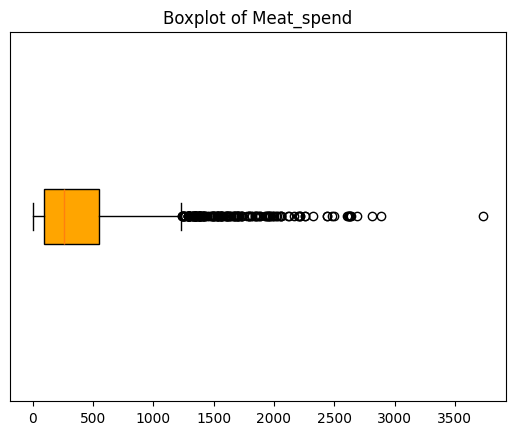

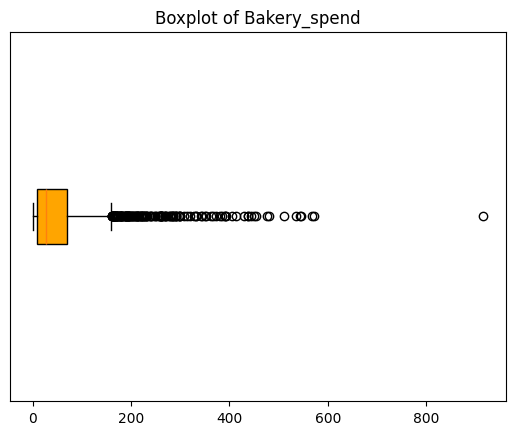

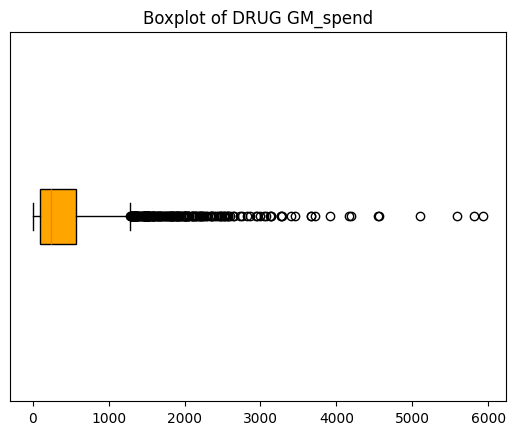

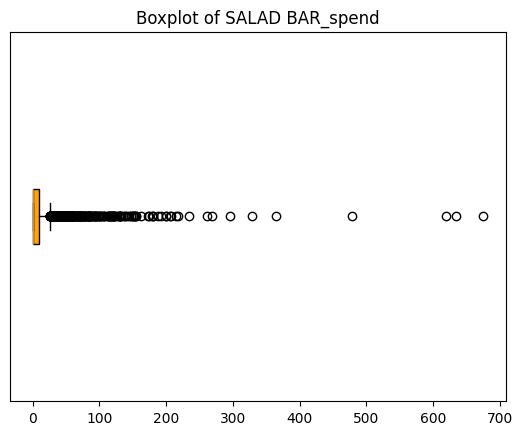

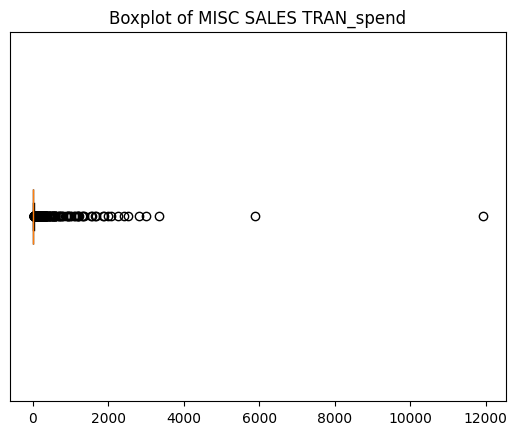

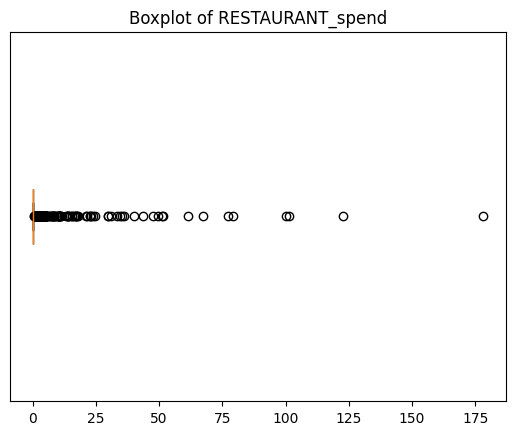

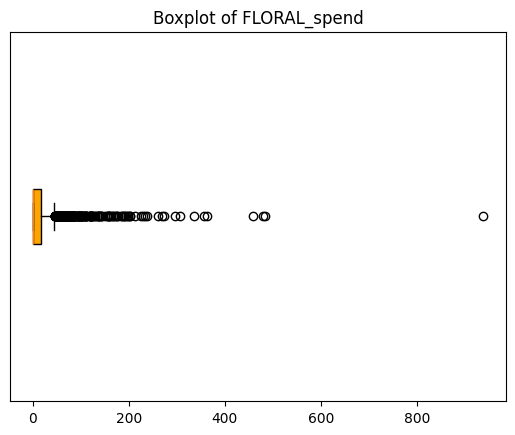

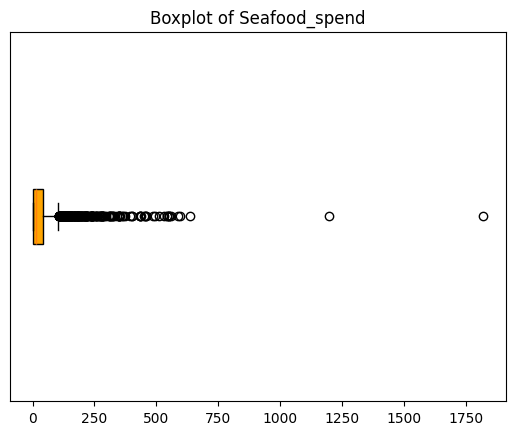

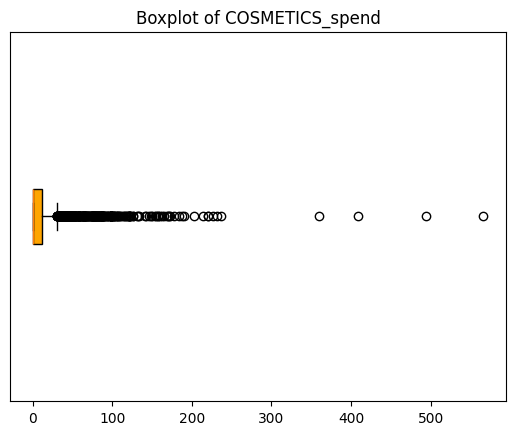

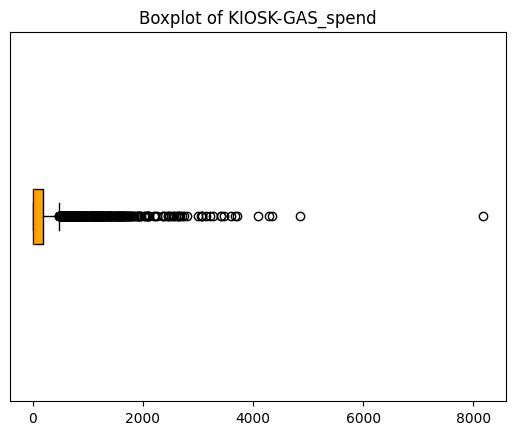

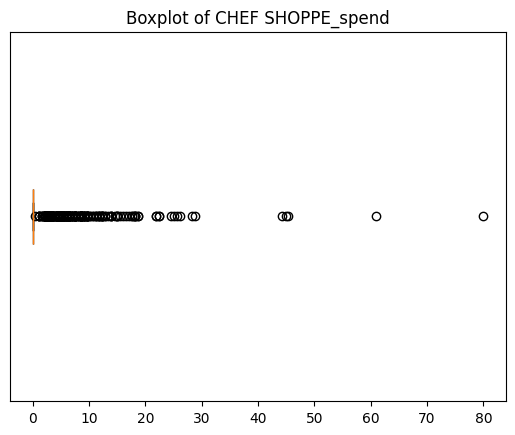

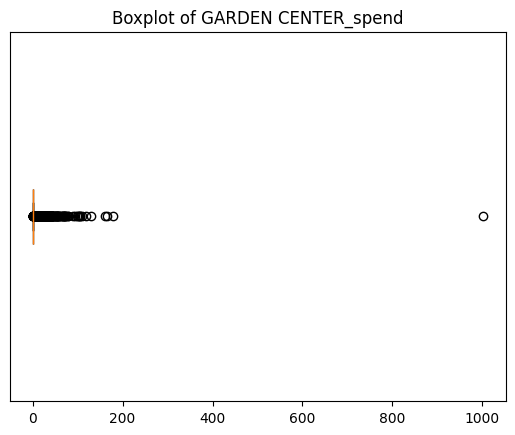

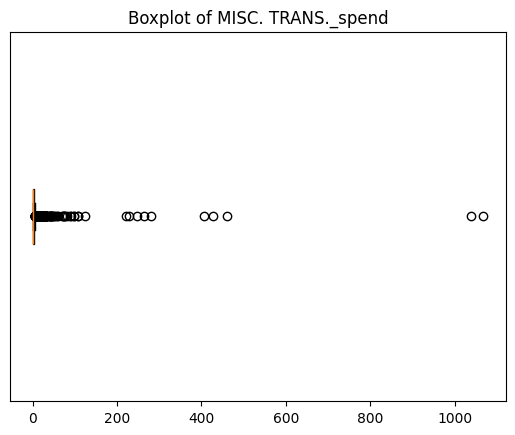

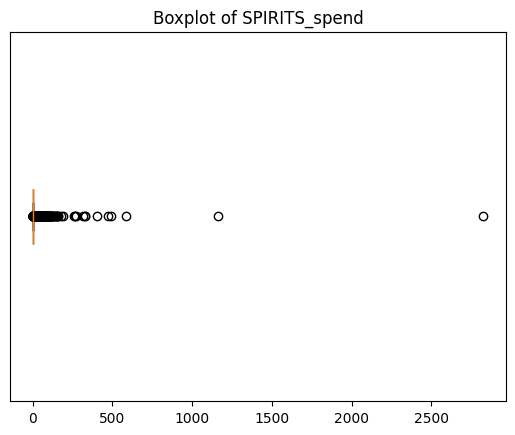

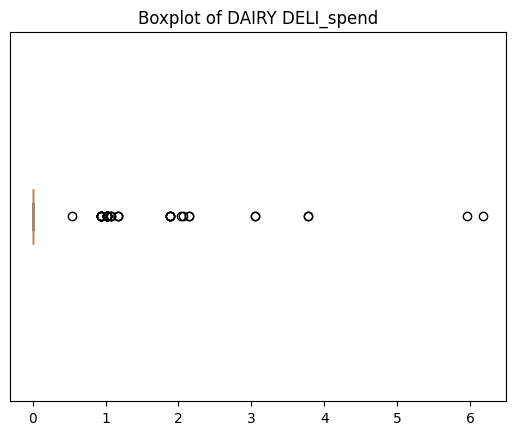

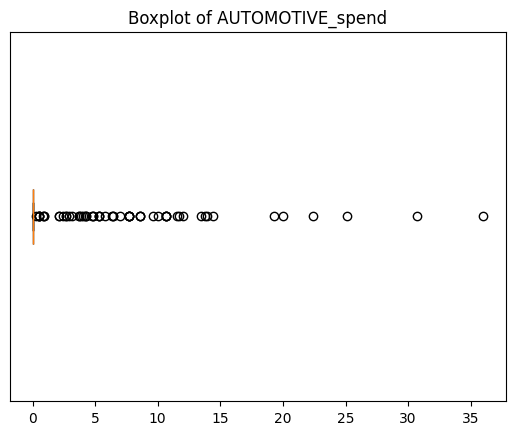

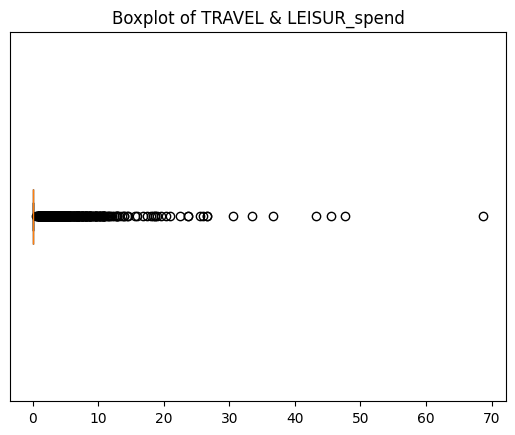

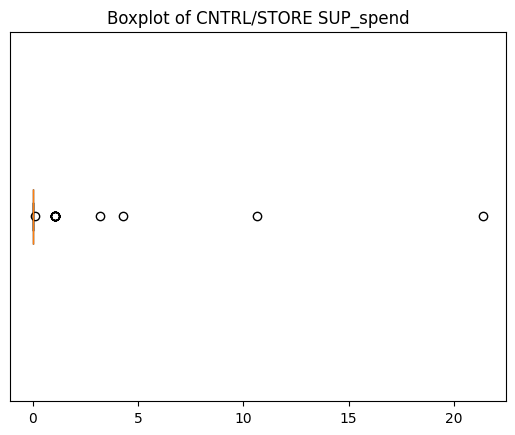

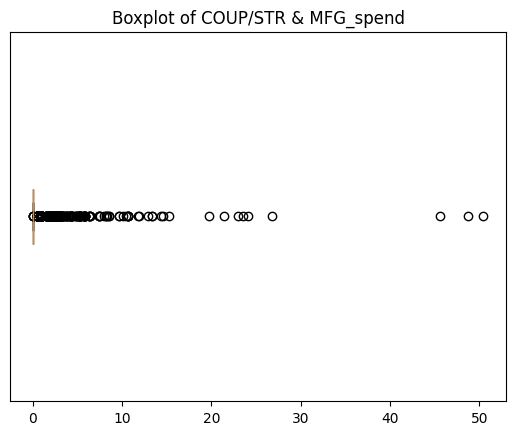

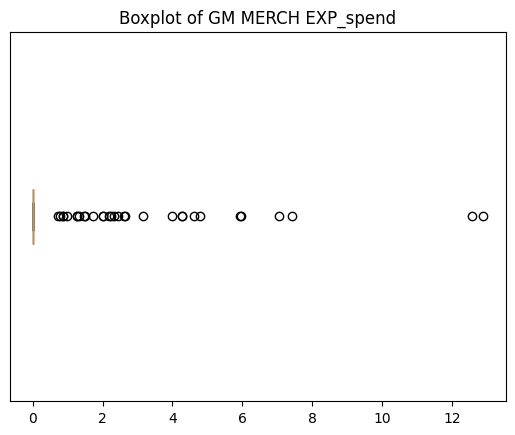

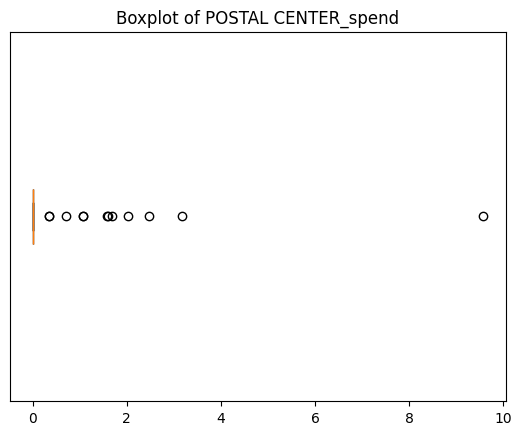

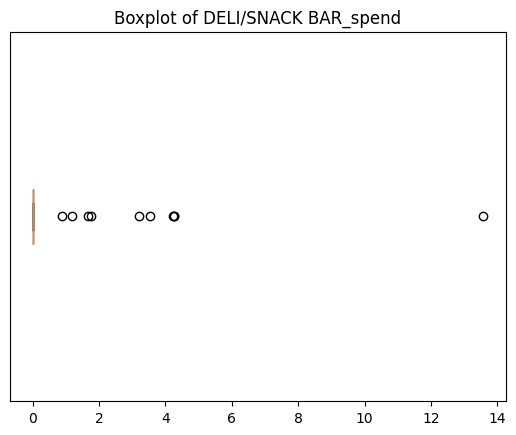

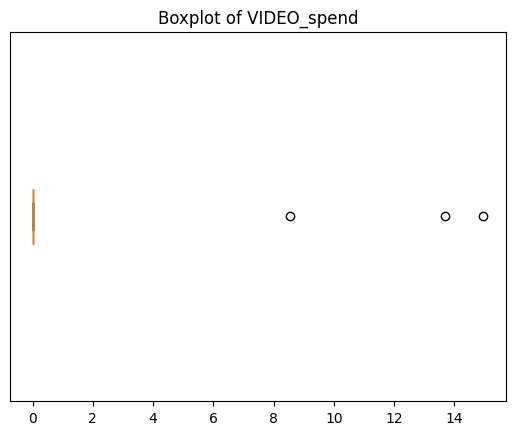

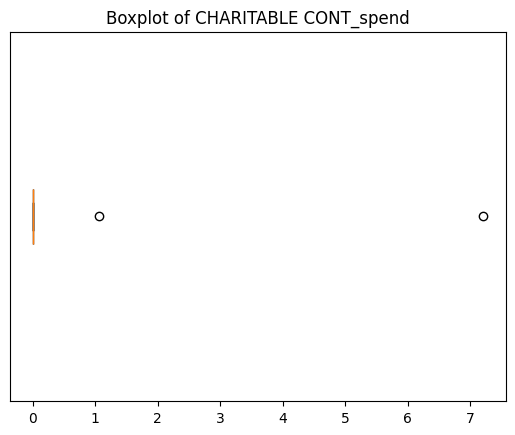

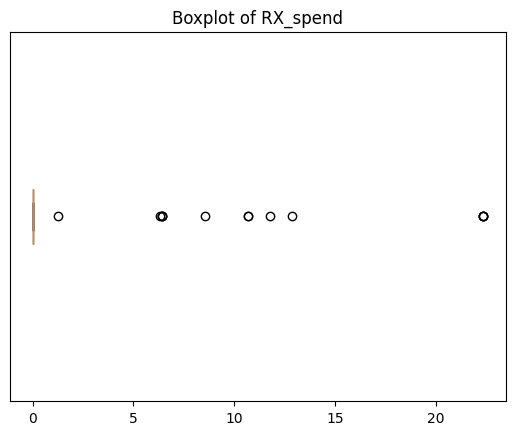

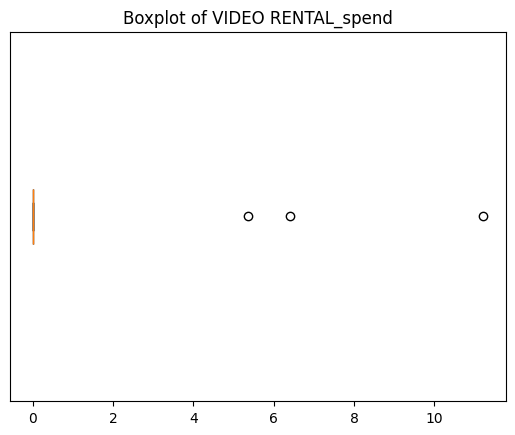

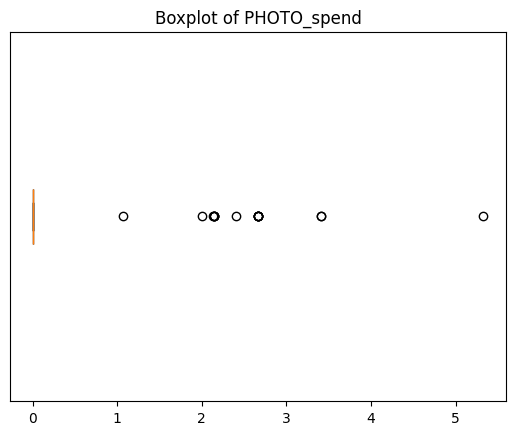

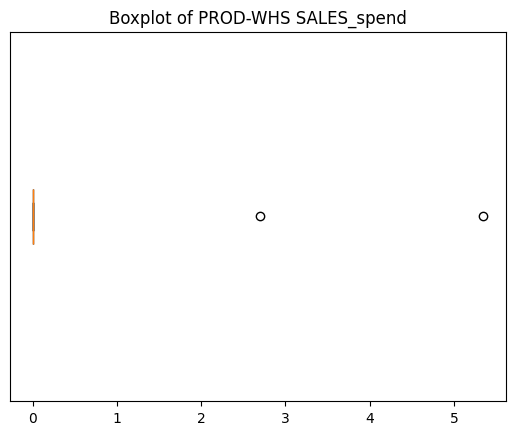

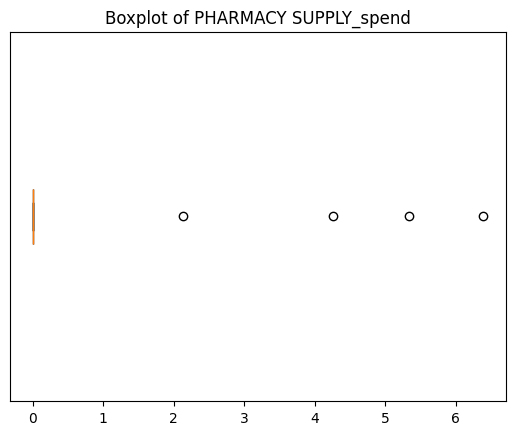

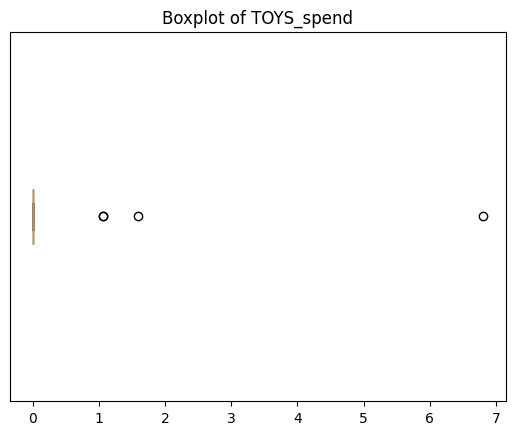

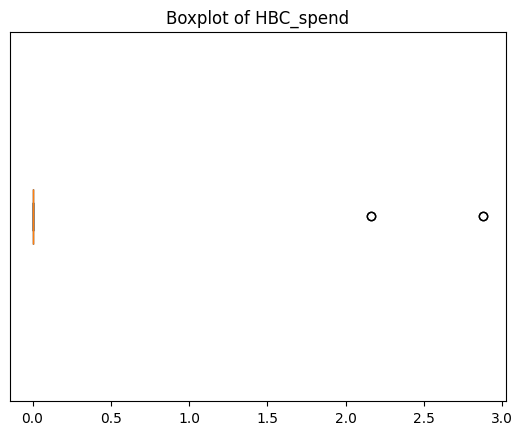

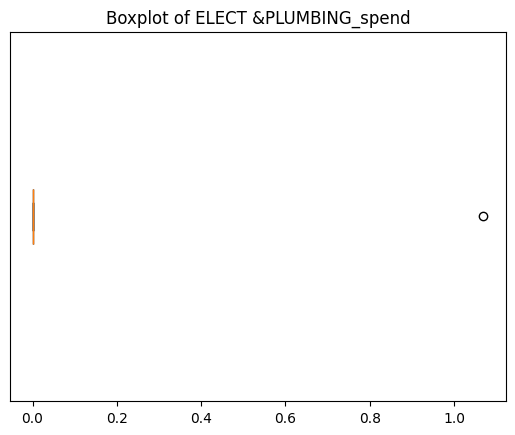

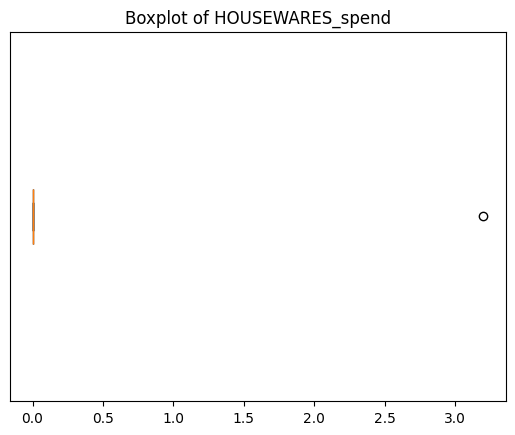

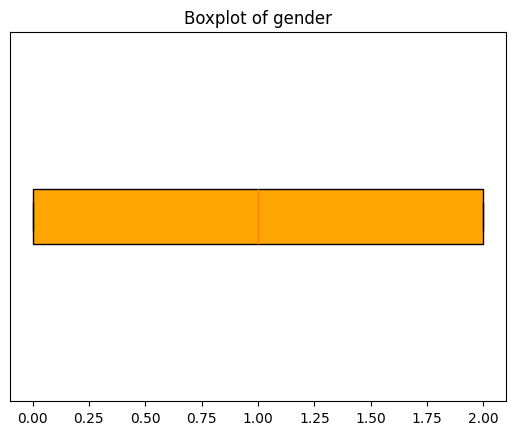

In [60]:
functions.graphs(customer_info.loc[:, customer_info.columns != 'household_key'], graph = 'boxplot')

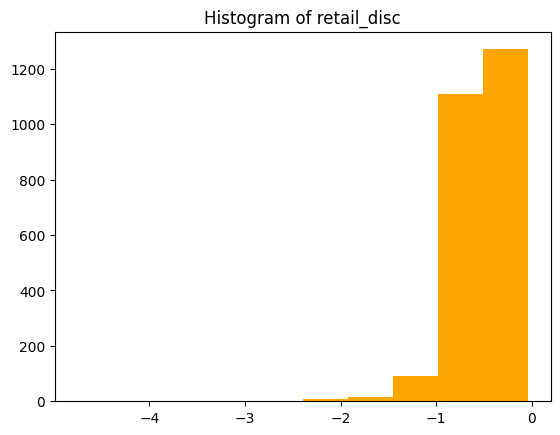

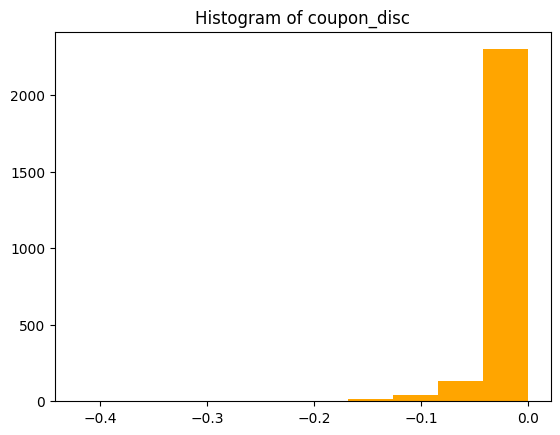

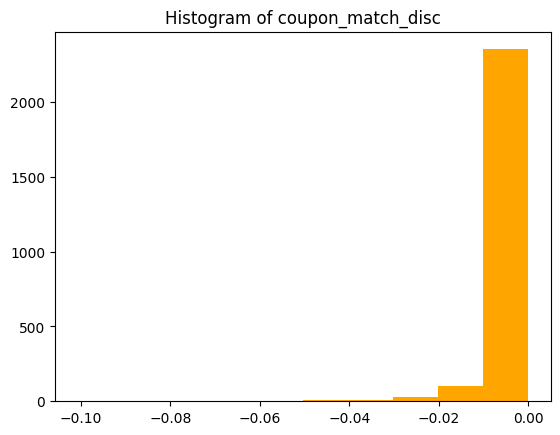

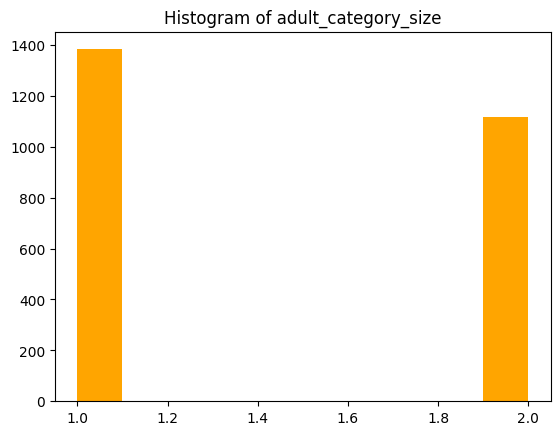

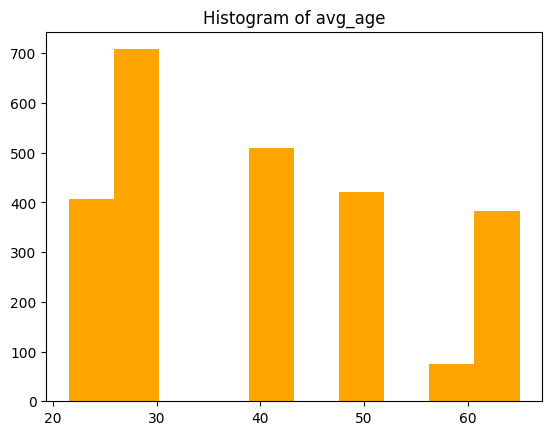

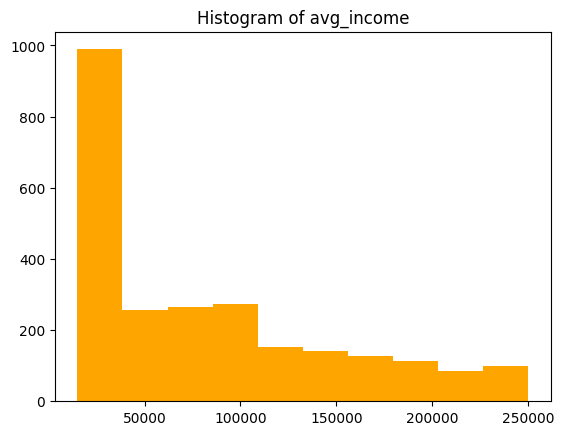

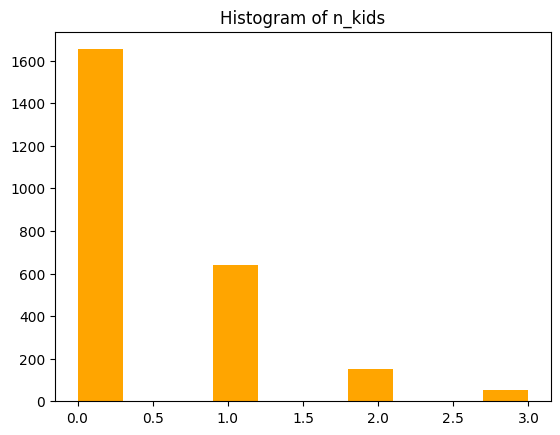

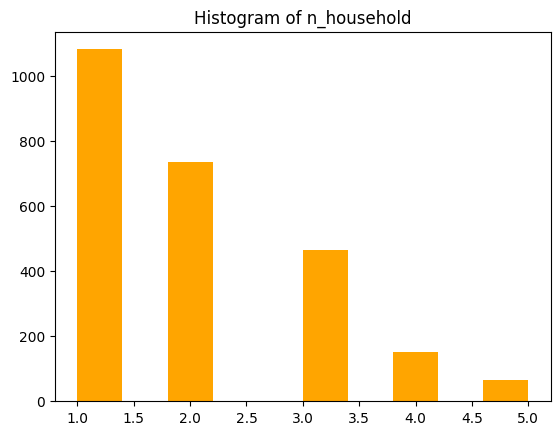

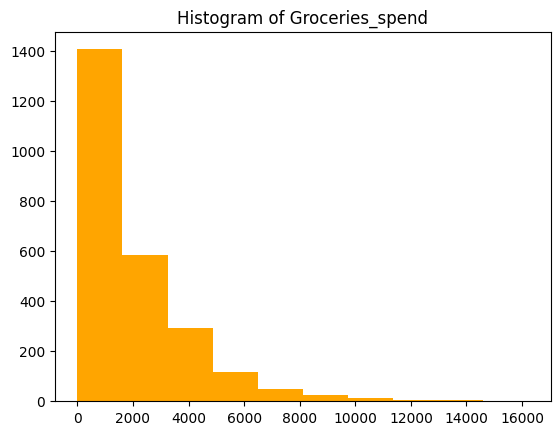

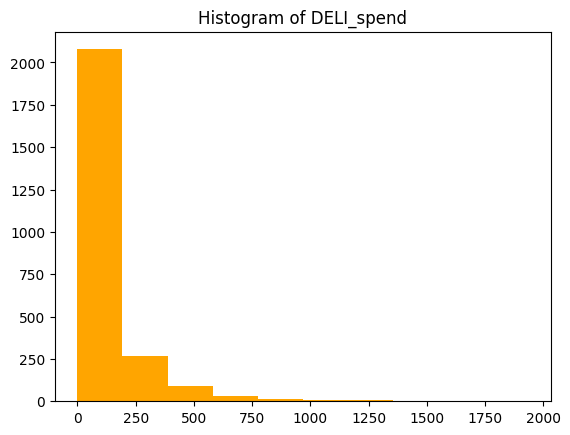

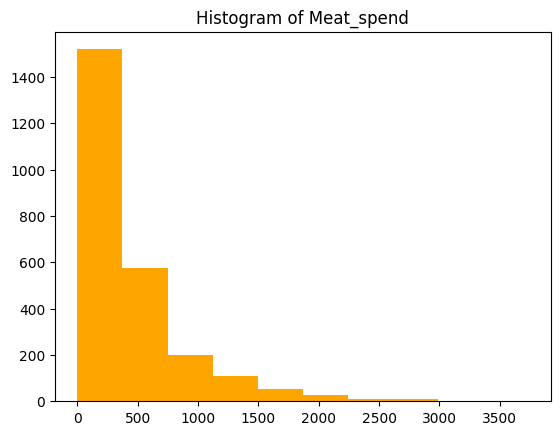

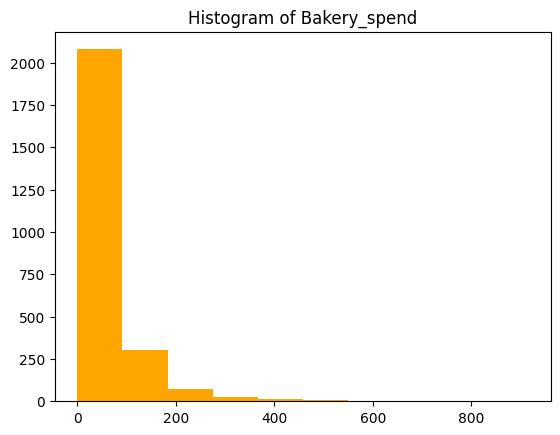

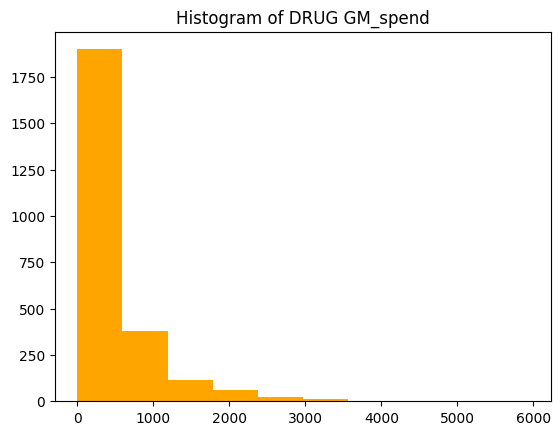

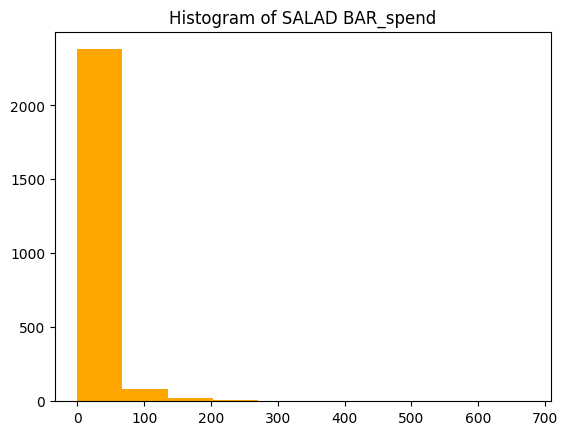

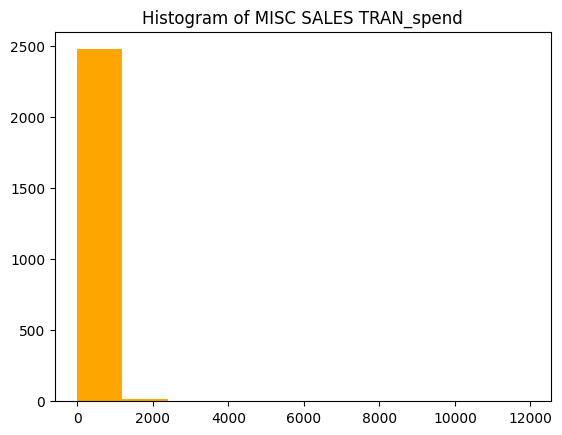

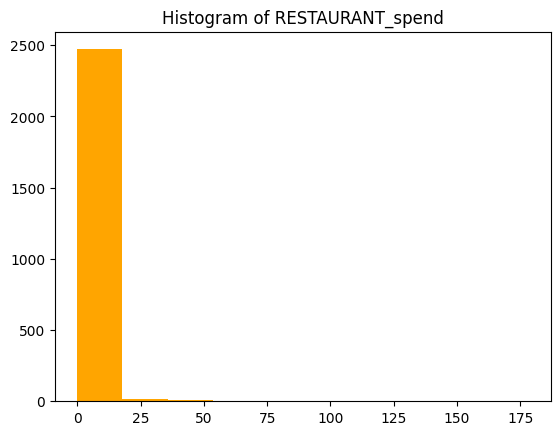

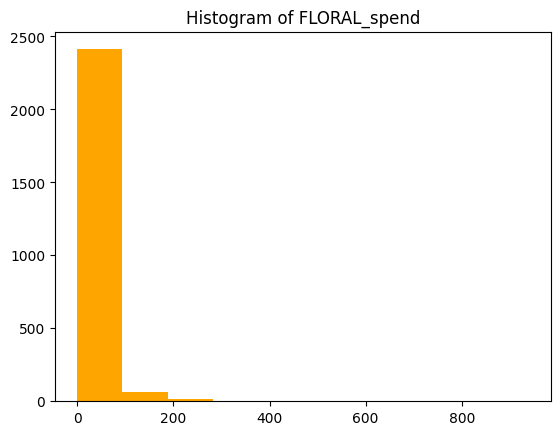

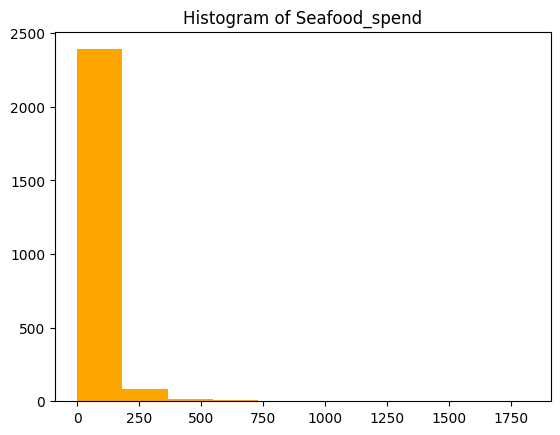

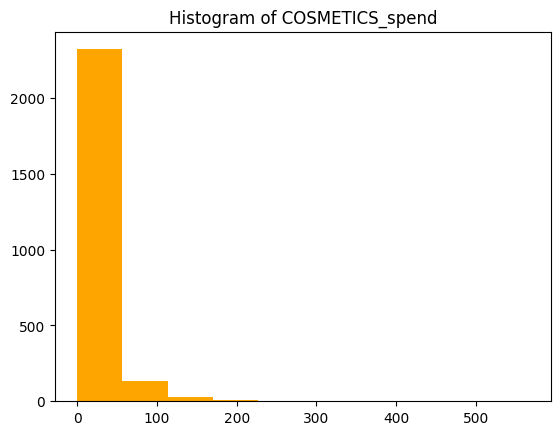

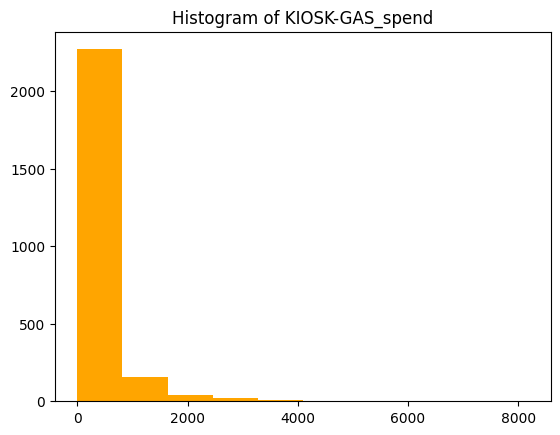

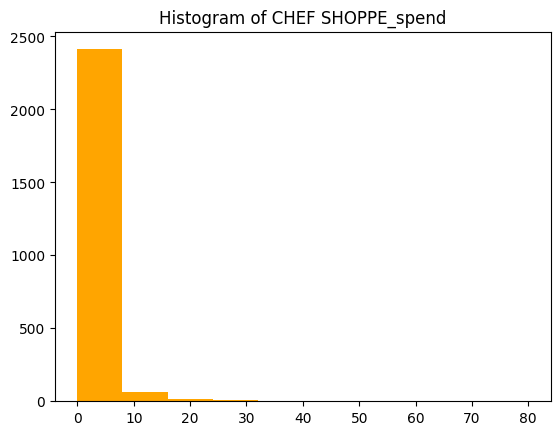

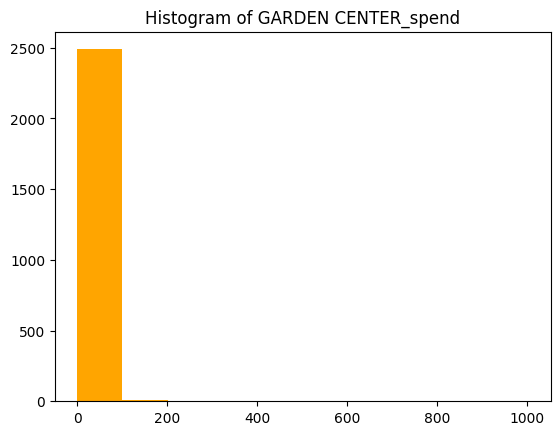

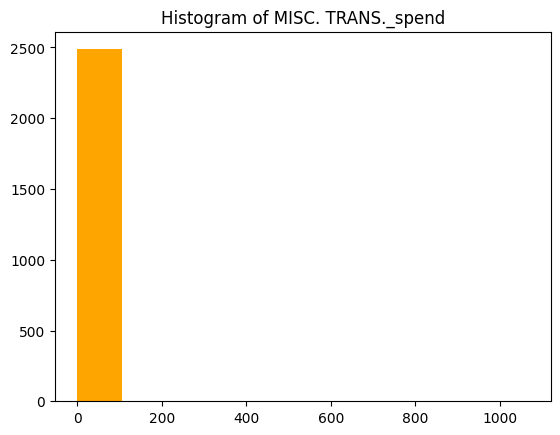

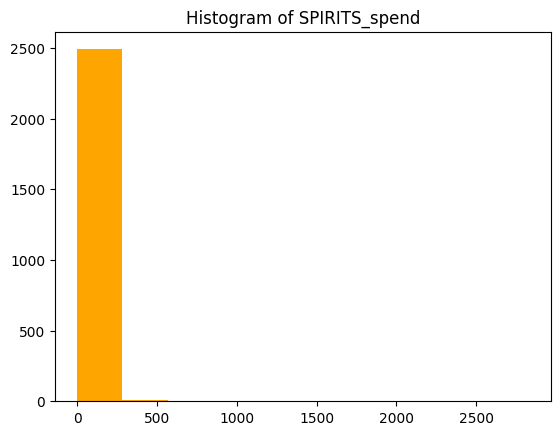

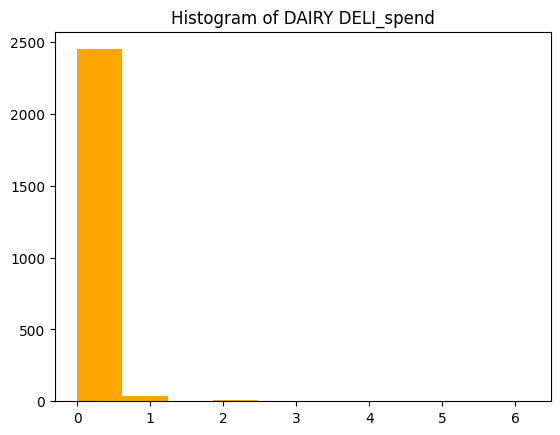

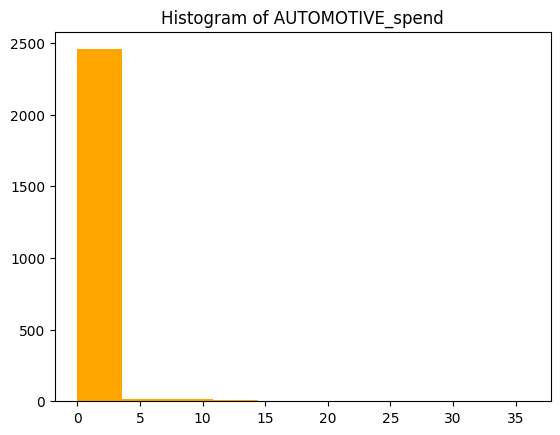

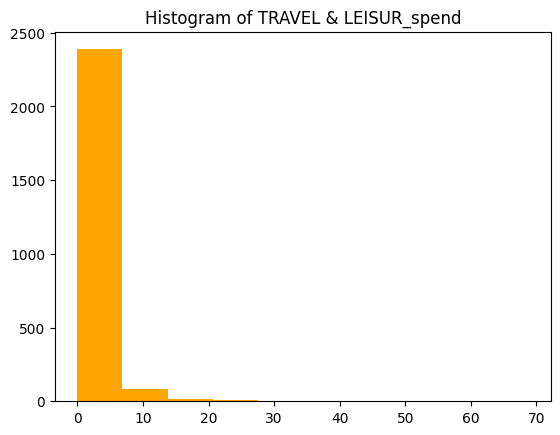

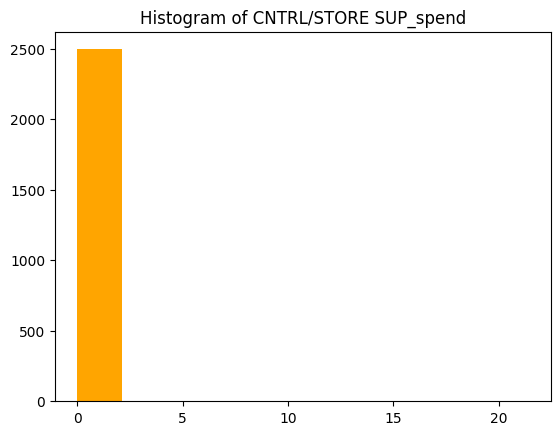

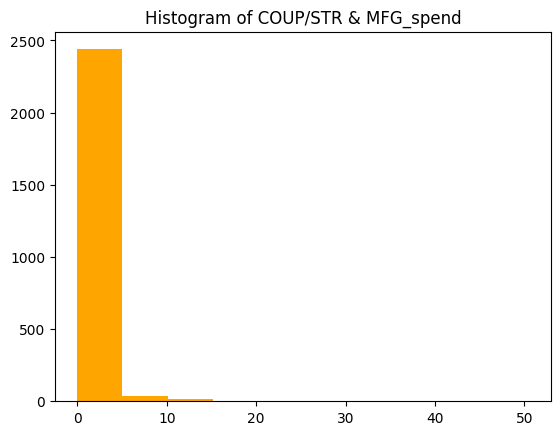

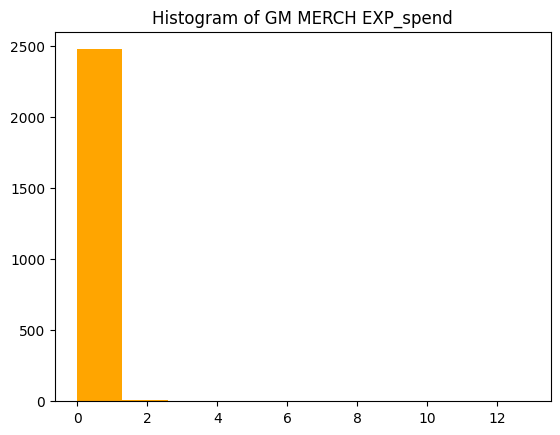

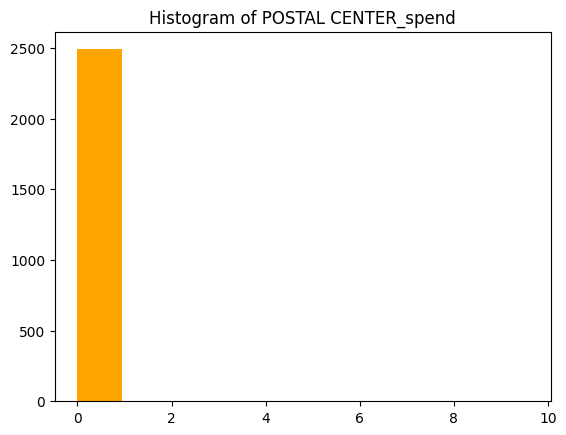

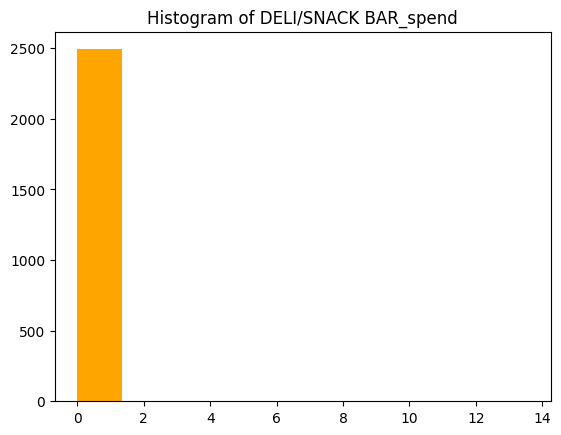

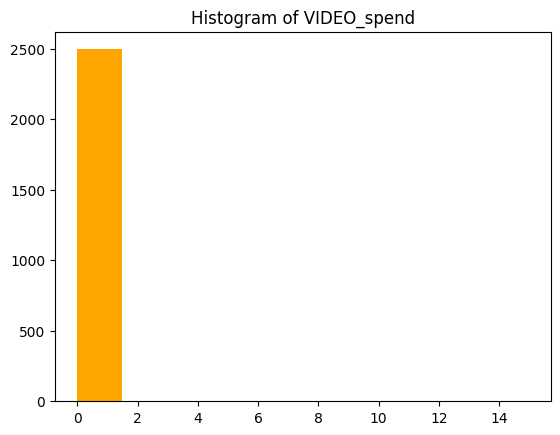

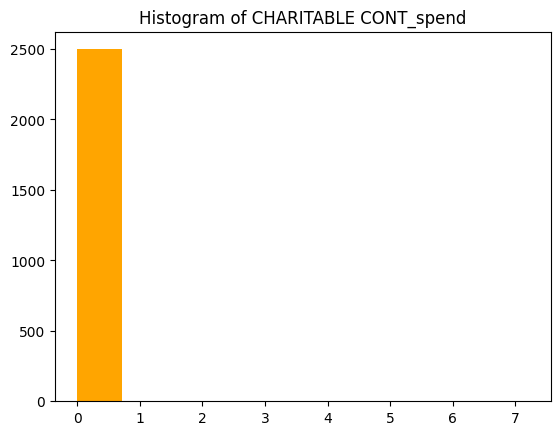

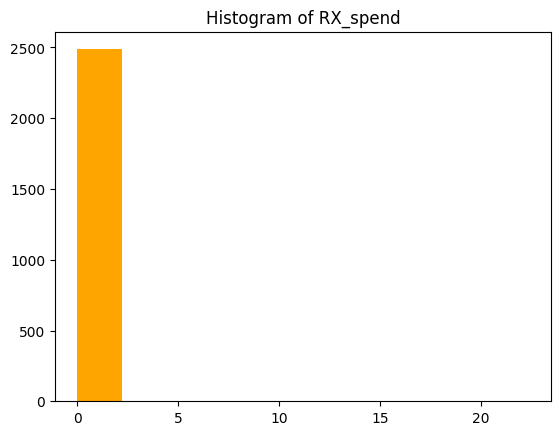

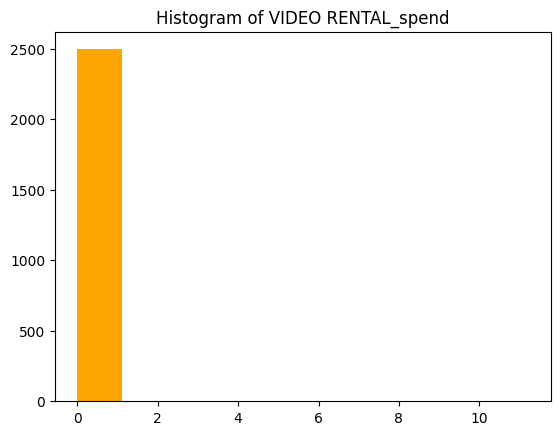

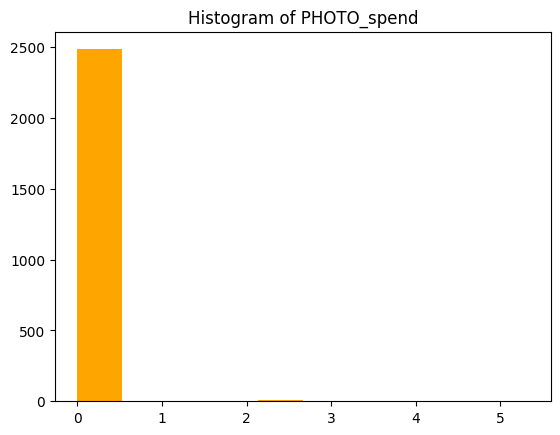

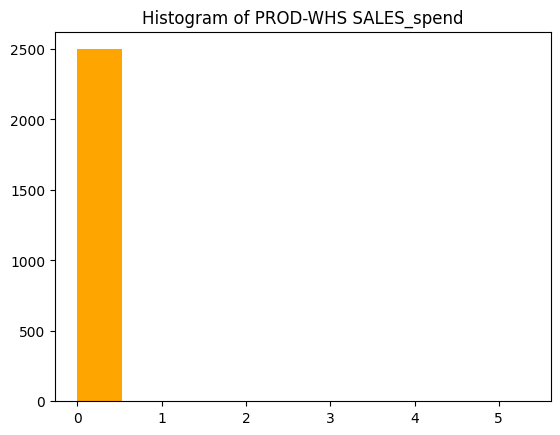

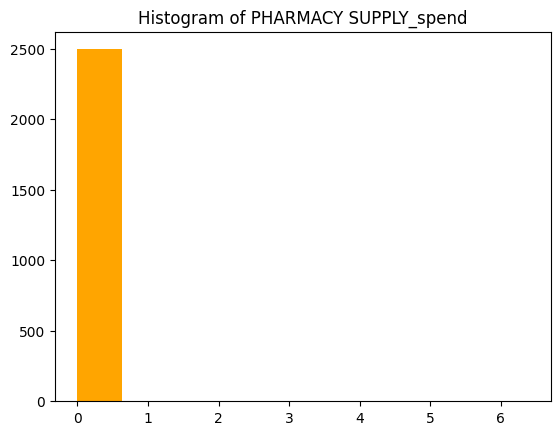

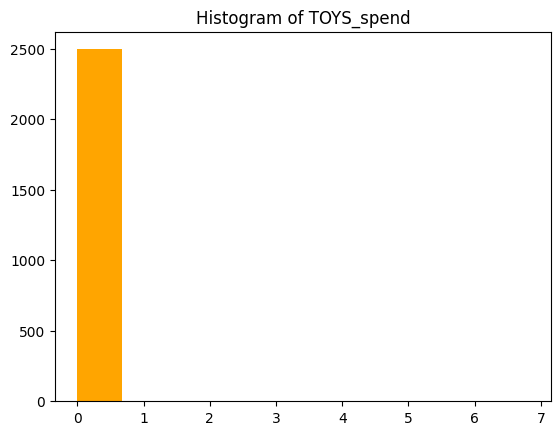

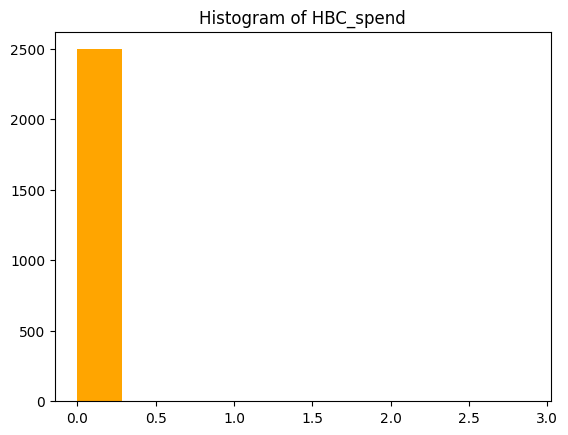

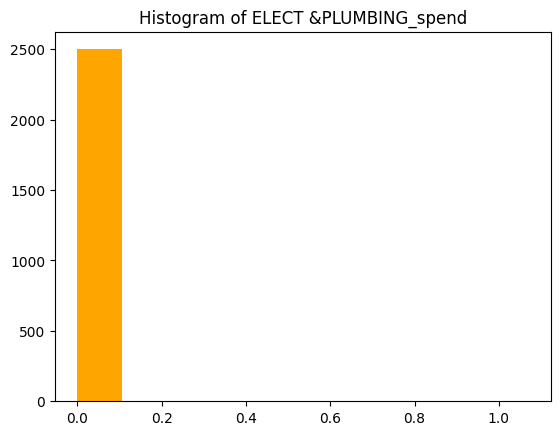

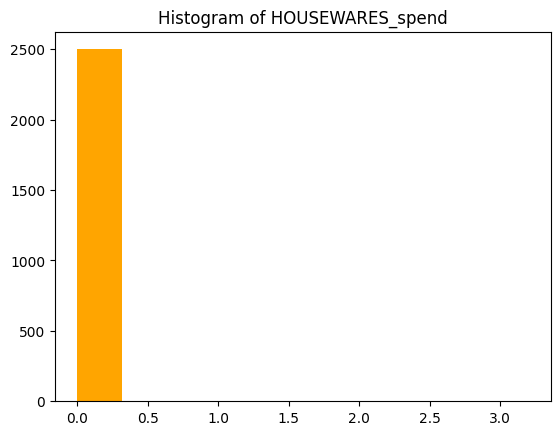

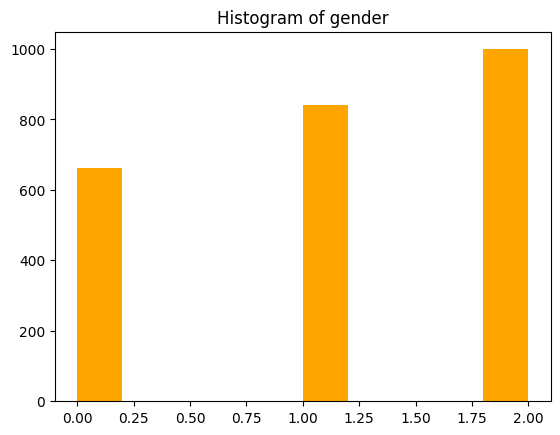

In [61]:
functions.graphs(customer_info.loc[:, customer_info.columns != 'household_key'], graph = 'histogram')

## Feature Engineering

In [62]:
customer_info.head(1)

,household_key,quantity,retail_disc,coupon_disc,coupon_match_disc,sales_value_eu,department,first_transaction_date,marital_status_code,homeowner_desc,marital_status,age_group,adult_category_size,has_kids,avg_age,avg_income,n_kids,n_household,Groceries_spend,DELI_spend,Meat_spend,Bakery_spend,DRUG GM_spend,SALAD BAR_spend,MISC SALES TRAN_spend,RESTAURANT_spend,FLORAL_spend,Seafood_spend,COSMETICS_spend,KIOSK-GAS_spend,CHEF SHOPPE_spend,GARDEN CENTER_spend,MISC. TRANS._spend,SPIRITS_spend,DAIRY DELI_spend,AUTOMOTIVE_spend,TRAVEL & LEISUR_spend,CNTRL/STORE SUP_spend,COUP/STR & MFG_spend,GM MERCH EXP_spend,POSTAL CENTER_spend,DELI/SNACK BAR_spend,VIDEO_spend,CHARITABLE CONT_spend,RX_spend,VIDEO RENTAL_spend,PHOTO_spend,PROD-WHS SALES_spend,PHARMACY SUPPLY_spend,TOYS_spend,HBC_spend,ELECT &PLUMBING_spend,HOUSEWARES_spend,gender
0,1,"[1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, ...",-0.403613,-0.046647,-0.015142,"[4.27, 3.2, 1.17, 3.97, 2.99, 7.69, 2.68, 1.59...","[Groceries, Groceries, Groceries, DELI, Grocer...",2021-02-20,A,Homeowner,married,senior,2.000000,False,65.000000,42000.000000,0.000000,2.000000,3285.020000,226.990000,373.560000,102.010000,568.230000,44.090000,21.400000,4.470000,8.550000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000


Marital Status

In [63]:
replacement_mapping = {
    'A': 0,
    'B': 1,
    'U': 2
}

customer_info['marital_status_code'] = customer_info['marital_status_code'].replace(replacement_mapping)


C:\Users\aprataso\AppData\Local\Temp\ipykernel_20724\582221539.py:7: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



Has Kids

In [64]:
replacement_mapping = {
    False: 0,
    True: 1
}

customer_info['has_kids'] = customer_info['has_kids'].replace(replacement_mapping)


C:\Users\aprataso\AppData\Local\Temp\ipykernel_20724\2471507936.py:6: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



Homeownere Status

In [65]:
replacement_mapping = {
    'Homeowner': 0,
    'Probable Owner': 1,
    'Renter': 2,
    'Probable Renter': 3,
    'Unknown': 4,
}

customer_info['homeowner_code'] = customer_info['homeowner_desc'].replace(replacement_mapping)


In [66]:
#customer_info['homeowner_desc'].unique()

Quantity

In [67]:
customer_info['total_quantity'] = customer_info['quantity'].apply(lambda x: sum(x))

Total Sales Value

In [68]:
customer_info['total_sales_value'] = customer_info['sales_value_eu'].apply(lambda x: round(sum(x), 2))

Department List

In [69]:
# Apply the function to each row in the 'text_column'
customer_info['unique_dep'] = customer_info['department'].apply(functions.unique_words)


In [70]:
customer_info.head(2)

,household_key,quantity,retail_disc,coupon_disc,coupon_match_disc,sales_value_eu,department,first_transaction_date,marital_status_code,homeowner_desc,marital_status,age_group,adult_category_size,has_kids,avg_age,avg_income,n_kids,n_household,Groceries_spend,DELI_spend,Meat_spend,Bakery_spend,DRUG GM_spend,SALAD BAR_spend,MISC SALES TRAN_spend,RESTAURANT_spend,FLORAL_spend,Seafood_spend,COSMETICS_spend,KIOSK-GAS_spend,CHEF SHOPPE_spend,GARDEN CENTER_spend,MISC. TRANS._spend,SPIRITS_spend,DAIRY DELI_spend,AUTOMOTIVE_spend,TRAVEL & LEISUR_spend,CNTRL/STORE SUP_spend,COUP/STR & MFG_spend,GM MERCH EXP_spend,POSTAL CENTER_spend,DELI/SNACK BAR_spend,VIDEO_spend,CHARITABLE CONT_spend,RX_spend,VIDEO RENTAL_spend,PHOTO_spend,PROD-WHS SALES_spend,PHARMACY SUPPLY_spend,TOYS_spend,HBC_spend,ELECT &PLUMBING_spend,HOUSEWARES_spend,gender,homeowner_code,total_quantity,total_sales_value,unique_dep
0,1,"[1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, ...",-0.403613,-0.046647,-0.015142,"[4.27, 3.2, 1.17, 3.97, 2.99, 7.69, 2.68, 1.59...","[Groceries, Groceries, Groceries, DELI, Grocer...",2021-02-20,0,Homeowner,married,senior,2.000000,0,65.000000,42000.000000,0.000000,2.000000,3285.020000,226.990000,373.560000,102.010000,568.230000,44.090000,21.400000,4.470000,8.550000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0,1997,4634.320000,"[Bakery, DRUG GM, DELI, MISC SALES TRAN, , Me..."
1,2,"[1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, ...",-0.469174,-0.012605,0.000000,"[0.7, 4.78, 1.07, 0.85, 2.68, 2.68, 2.68, 5.35...","[Groceries, Groceries, Groceries, Groceries, G...",2021-04-13,1,Probable Owner,single,young adult,1.000000,0,21.500000,25000.000000,0.000000,1.000000,1361.500000,50.010000,238.860000,26.550000,353.110000,0.000000,4.560000,0.000000,23.530000,9.620000,23.620000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1,834,2091.360000,"[Bakery, DRUG GM, DELI, MISC SALES TRAN, Meat,..."


In [71]:
customer_info = customer_info.drop(['quantity', 'sales_value_eu', 'department'], axis = 1)

## Correlation Analysis

In [72]:
# creating a new variable with only numeric data
info_numeric = customer_info.loc[:, ~customer_info.columns.isin(
    ['homeowner_desc', 'marital_status', 'age_group',
     'first_transaction_date', 'unique_dep', 'homeowner_code'])]

In [73]:
info_numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 49 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   household_key          2500 non-null   int64  
 1   retail_disc            2500 non-null   float64
 2   coupon_disc            2500 non-null   float64
 3   coupon_match_disc      2500 non-null   float64
 4   marital_status_code    2500 non-null   int64  
 5   adult_category_size    2500 non-null   float64
 6   has_kids               2500 non-null   int64  
 7   avg_age                2500 non-null   float64
 8   avg_income             2500 non-null   float64
 9   n_kids                 2500 non-null   float64
 10  n_household            2500 non-null   float64
 11  Groceries_spend        2500 non-null   float64
 12  DELI_spend             2500 non-null   float64
 13  Meat_spend             2500 non-null   float64
 14  Bakery_spend           2500 non-null   float64
 15  DRUG

In [74]:
import numpy as np

cor_spearman = info_numeric.corr(method='spearman')

mask = np.triu(np.ones_like(cor_spearman, dtype=bool))

# Apply the mask to the correlation matrix
cor_spearman_masked = cor_spearman.copy()
cor_spearman_masked[mask] = np.nan

# Plotly heatmap
fig = go.Figure(data=go.Heatmap(
    z=cor_spearman_masked,
    x=cor_spearman.columns,
    y=cor_spearman.columns,
    colorscale='Blues',
    colorbar=dict(title='Spearman Correlation'),
    zmin=-1, zmax=1,
    hoverongaps=False
))

fig.update_layout(
    title='Spearman Correlation Heatmap (Below Diagonal)',
    xaxis_title='Variables',
    yaxis_title='Variables',
    xaxis=dict(tickangle=90,  tickfont=dict(size=10)),
    yaxis=dict(tickangle=0,  tickfont=dict(size=10)),
    width=1300,
    height=1300,
)

# Show the interactive plot
fig.show()


## Export

In [75]:
customer_info = customer_info.to_csv(
    'C:/Users/aprataso/Downloads/final_data/treated/customer_info_EDA.csv',
    index=False)

## Tests

In [ ]:
customer_info[customer_info['male'] == 1]['male'].count()